In this example, we use the make_classification function to generate a synthetic dataset with two classes of points in a 3D space. The dataset has three features and the points are scattered in the 3D space.

We use a logistic regression algorithm to train the model using the original feature set.

To plot the decision boundary, we generate a meshgrid that covers the entire range of the dataset in the three dimensions, and use the predict method of the trained model to classify each point in the grid. The points that are classified as class 0 are colored in one color and the points that are classified as class 1 are colored in another color, this creates a 3D surface that separates the different classes.

You can try different classification algorithms, datasets and parameters to see how the decision boundary changes. Also, you can try with different plotting libraries

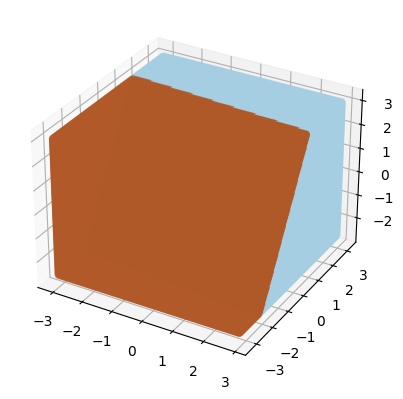

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
X, y = make_classification(n_samples=100, n_features=3, n_informative=3, n_redundant=0, n_classes=2, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a logistic regression model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# Create a meshgrid to plot the decision boundary
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x3_min, x3_max = X[:, 2].min() - .5, X[:, 2].max() + .5
xx1, xx2, xx3 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100), np.linspace(x3_min, x3_max, 100))

# Flatten the meshgrid and classify each point
X_grid = np.c_[xx1.ravel(), xx2.ravel(), xx3.ravel()]
y_grid = clf.predict(X_grid).reshape(xx1.shape)

# Plot the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_grid[:,0], X_grid[:,1], X_grid[:,2], c=y_grid, cmap=plt.cm.Paired)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, edgecolors='k')
plt.show()
